In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.14089958 0.32488204 0.04153138 ... 0.26691062 0.19350917 0.11062185]
 [0.27076228 0.62431556 0.07980954 ... 0.5129137  0.37186046 0.21257852]
 [0.0752627  0.17353849 0.02218434 ... 0.14257256 0.10336456 0.0590896 ]
 ...
 [0.12545468 0.28926966 0.03697886 ... 0.23765285 0.1722974  0.09849589]
 [0.21881862 0.50454544 0.0644987  ... 0.41451516 0.3005219  0.17179697]
 [0.08251479 0.19026013 0.02432195 ... 0.15631042 0.11332445 0.06478329]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.15880989  0.26412916  0.20746121 ...  0.21046451  0.2486346
   0.14414175]
 [ 0.14192989  0.65309797 -0.01935674 ...  0.24368872  0.43190555
   0.21560083]
 [ 0.08339975  0.12402113  0.02443875 ...  0.05040601  0.08322374
  -0.01635201]
 ...
 [-0.03552627  0.27585808 -0.01219842 ...  0.29456544  0.14894758
  -0.24653392]
 [ 0.17452862  0.46160974 -0.03392502 ...  0.46132596  0.31373128
   0.23061469]
 [ 0.08543279  0.22073982  0.09045422 ...  0.07733896  0.03581077
   0.295

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:
mycebmf= cEBMF(data= noisy_matrix)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


[-0.18109453 -0.13728329  0.02121978  0.13774296 -0.03785976  0.08580245
 -0.08520756  0.12250913  0.11691424 -0.24089197 -0.12424513  0.01231897
 -0.26630938 -0.14413411  0.14104957  0.12366635  0.29002426 -0.14874186
  0.29961503  0.00811105 -0.14247259  0.02878429  0.02244026 -0.02962317
 -0.01619522  0.15591147 -0.00792835  0.057034   -0.0458892   0.16807368
  0.16362679 -0.08876107 -0.08056161  0.21104986  0.18514983  0.06435645
  0.04915949 -0.34220266  0.09172549  0.31096     0.14683017 -0.28495961
 -0.46374539  0.35666811 -0.13689725  0.07905052 -0.27075425  0.06717589
  0.20512549 -0.01743174]
[ 0.02140089 -0.08138717  0.00944205  0.00082795  0.09724918 -0.11408019
  0.00884484  0.14396552 -0.26086297 -0.26589247  0.14874879 -0.16021106
 -0.04737311 -0.016243   -0.13273622 -0.22520488  0.09839788  0.21171859
  0.30477933 -0.27729294 -0.02570654 -0.03435313 -0.12649789  0.30376569
  0.15626759 -0.12521187  0.03355878 -0.20679595 -0.00655777 -0.03024431
  0.21193415  0.10673045 

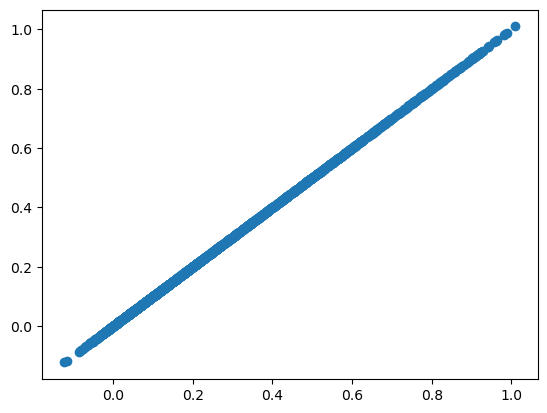

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

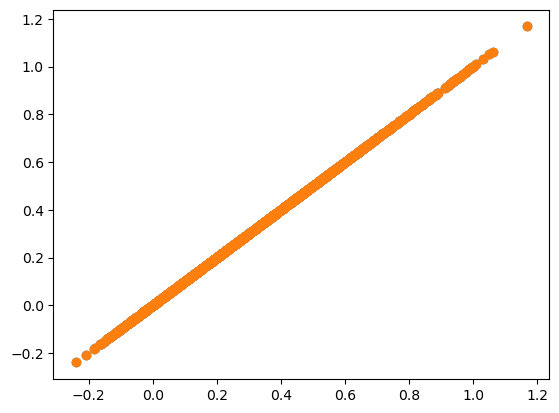

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
mycebmf.tau

array([[152.85842524, 152.85842524, 152.85842524, ..., 152.85842524,
        152.85842524, 152.85842524],
       [152.85842524, 152.85842524, 152.85842524, ..., 152.85842524,
        152.85842524, 152.85842524],
       [152.85842524, 152.85842524, 152.85842524, ..., 152.85842524,
        152.85842524, 152.85842524],
       ...,
       [152.85842524, 152.85842524, 152.85842524, ..., 152.85842524,
        152.85842524, 152.85842524],
       [152.85842524, 152.85842524, 152.85842524, ..., 152.85842524,
        152.85842524, 152.85842524],
       [152.85842524, 152.85842524, 152.85842524, ..., 152.85842524,
        152.85842524, 152.85842524]])

In [9]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

norm


In [10]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([-0.06326533, -0.16216799, -0.02478756, -0.03969101, -0.04569945,
        -0.16046648, -0.15800318, -0.03385154, -0.14507961, -0.20654095,
        -0.0695068 , -0.18292002, -0.05417648, -0.25553236, -0.04468173,
        -0.14949386, -0.06757601, -0.25602181, -0.14698606, -0.24080412,
        -0.22530015, -0.0743899 , -0.01645079, -0.17368337, -0.11416794,
        -0.18692842, -0.01145785, -0.11853438, -0.24958818, -0.2016952 ,
        -0.24529429, -0.26155384, -0.18616931, -0.23449735, -0.24155295,
        -0.07809692, -0.04014671, -0.13991305, -0.10732534, -0.05539316]),
 array([0.00512535, 0.00512535, 0.00512535, 0.00512535, 0.00512535,
        0.00512535, 0.00512535, 0.00512535, 0.00512535, 0.00512535,
        0.00512535, 0.00512535, 0.00512535, 0.00512535, 0.00512535,
        0.00512535, 0.00512535, 0.00512535, 0.00512535, 0.00512535,
        0.00512535, 0.00512535, 0.00512535, 0.00512535, 0.00512535,
        0.00512535, 0.00512535, 0.00512535, 0.00512535, 0.00512535,
      

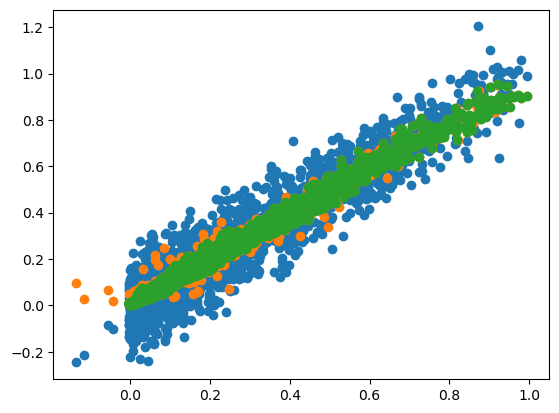

In [32]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


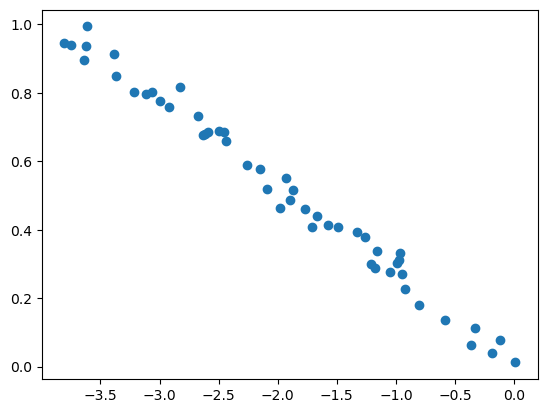

In [30]:
plt.scatter(mycebmf.L[:,0], u)

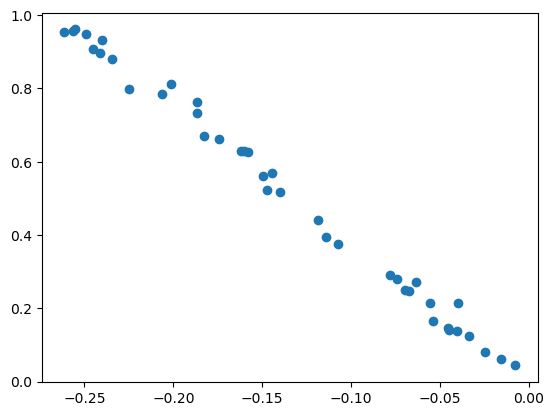

In [31]:
plt.scatter(mycebmf.F[:,0], v)